<a href="https://colab.research.google.com/github/swethapatlori/Student_marks_Data-science/blob/main/Student_Marks_DataSet_649303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Marks Dataset**

 The Dataset contains Marks,no.of courses and study time of students

In [ ]:
# importing the libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv file from the device**

Importing data using the pandas library

Understanding the structure of the data

In [ ]:
path = "/content/drive/MyDrive/Dataset/Student_Marks.csv"
student_marks= pd.read_csv(path)
student_marks.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
student_marks.shape

(100, 3)

The data set contains 100 Rows and 3 Columns

In [ ]:
student_marks.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
student_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


There is no null count in dataset

In [ ]:
student_marks.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

The number of columns are 3 and its type is printed.

**Data Cleaning and Preparation**

There is no need to do "lambda" or "unique()" funtions because of absence of string varaibles in the data set.

**Indentifying duplicates**

In [ ]:
student_marks.loc[student_marks.duplicated()]

,number_courses,time_study,Marks


No duplicates found

**Data Visualization**

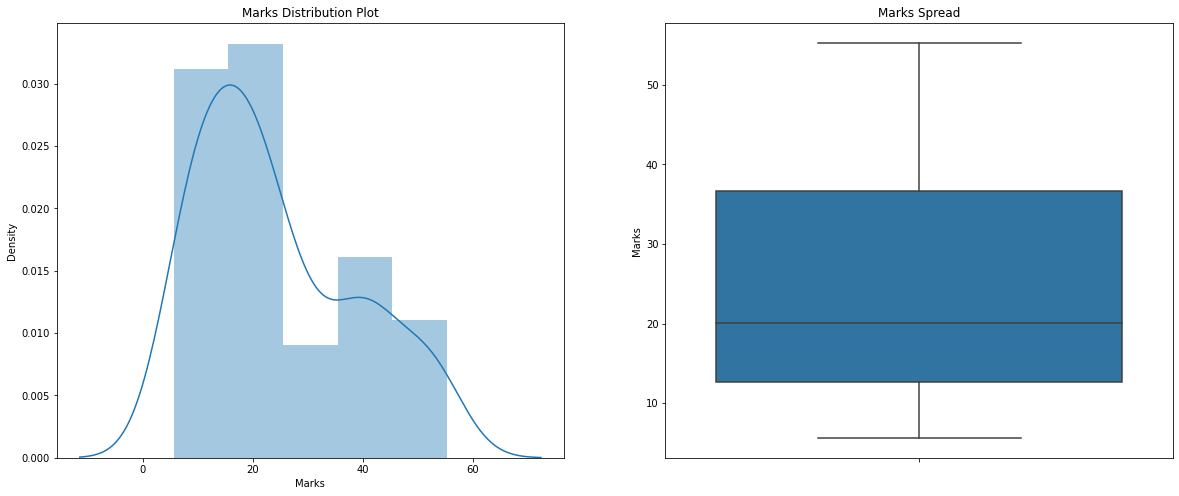

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Marks Distribution Plot')
sns.distplot(student_marks.Marks)

plt.subplot(1,2,2)
plt.title('Marks Spread')
sns.boxplot(y=student_marks.Marks)
plt.show()

Text(0.5, 1.0, 'Marks Vs time_study')

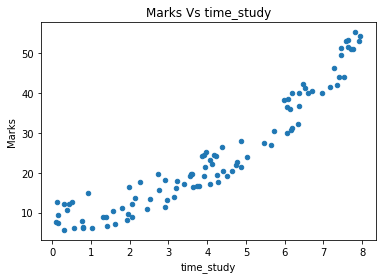

In [ ]:
student_marks.plot(kind='scatter',x='time_study',y='Marks')
plt.title('Marks Vs time_study')

Students who spent more time will get more marks

Text(0.5, 1.0, 'Marks Vs number_courses')

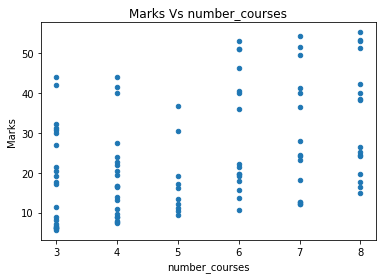

In [ ]:
student_marks.plot(kind='scatter',x='number_courses',y='Marks')
plt.title('Marks Vs number_courses')

 The students who chose more than six courses got more marks than who chose below six courses

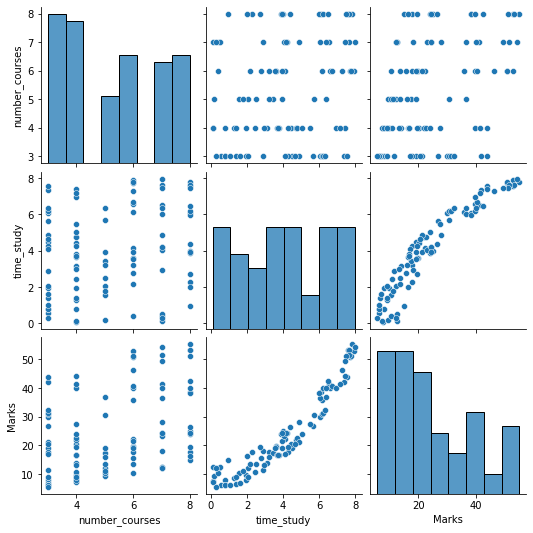

In [ ]:
sns.pairplot(student_marks)
plt.show()

The plot between Marks Vs time_study will be the better linear regression.so the correlation coefficient is high in this case.

In [ ]:
np.corrcoef(student_marks['Marks'],student_marks['time_study'])[0,1]

0.9422538903640542

The correlation coefficient between Marks Vs time_study is 0.942

Not necessary to introduce "Dummy variables" in this projects, due to absence of string variables in the Data set

**Introduced "MiniMaxScaler()" to to reduce the every value from 0 to 1 in the Data set**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Marks','time_study','number_courses']
student_marks[num_vars] = scaler.fit_transform(student_marks[num_vars])

In [ ]:
student_marks.head()

,number_courses,time_study,Marks
0,0.0,0.561252,0.273556
1,0.2,0.000000,0.042765
2,0.2,0.386338,0.165063
3,0.6,0.993894,0.954095
4,1.0,0.981427,1.000000


In [ ]:
student_marks.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,0.458000,0.506442,0.378521
std,0.359905,0.301859,0.288312
min,0.000000,0.000000,0.000000
25%,0.200000,0.249650,0.141356
50%,0.400000,0.499428,0.290813
75%,0.800000,0.773852,0.625221
max,1.000000,1.000000,1.000000


Correlation using heatmap

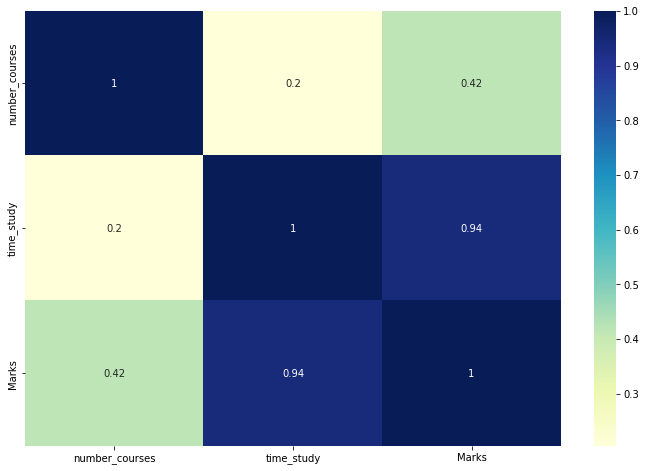

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(student_marks.corr(), annot = True, cmap="YlGnBu")
plt.show()


heatmap also shows the highest correlation between Marks and time_study

In [ ]:
x= student_marks[['time_study','number_courses']]
y=student_marks[['Marks']]

print(x)
print(y)

    time_study  number_courses
0     0.561252             0.0
1     0.000000             0.2
2     0.386338             0.2
3     0.993894             0.6
4     0.981427             1.0
..         ...             ...
95    0.440784             0.6
96    0.026078             0.0
97    0.898995             0.2
98    0.027096             0.8
99    0.793665             0.0

[100 rows x 2 columns]
       Marks
0   0.273556
1   0.042765
2   0.165063
3   0.954095
4   1.000000
..       ...
95  0.272067
96  0.000000
97  0.721171
98  0.129161
99  0.538297

[100 rows x 1 columns]


**Split the dataset in training set and test set**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(x,y,train_size=0.75, test_size=0.25, random_state=100 )
x_train,x_test, y_train, y_test.head()

(    time_study  number_courses
 22    0.248696             0.4
 23    0.607938             0.8
 90    0.519781             0.8
 86    0.505152             0.8
 20    0.589874             0.2
 ..         ...             ...
 79    0.090192             0.0
 87    0.119196             0.0
 67    0.057753             0.0
 24    0.450197             0.2
 8     0.548785             0.2
 
 [75 rows x 2 columns],     time_study  number_courses
 37    0.914260             0.6
 62    0.446508             0.6
 26    0.052411             0.8
 41    0.338125             0.6
 35    0.947335             0.0
 25    0.166773             0.0
 36    0.365093             0.2
 33    0.826612             0.6
 77    0.749141             1.0
 21    0.767078             0.6
 85    0.776619             1.0
 50    0.840478             0.6
 92    0.627274             0.2
 69    0.490014             0.6
 96    0.026078             0.0
 78    0.935632             0.8
 72    0.577153             0.0
 5     0.396260

In [ ]:
#import libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train) 
rfe = RFE(lr, n_features_to_select=2)
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('time_study', True, 1), ('number_courses', True, 1)]

In [ ]:
x_train.columns[rfe.support_]

Index(['time_study', 'number_courses'], dtype='object')

In [ ]:
x_train_rfe = x_train[x_train.columns[rfe.support_]] # we reduce the training set to the identified features
x_train_rfe.head()

,time_study,number_courses
22,0.248696,0.4
23,0.607938,0.8
90,0.519781,0.8
86,0.505152,0.8
20,0.589874,0.2


In [ ]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant # this simply adds a column of ones to the model
    lm = sm.OLS(y,x).fit() # fitting the model using ordinary least squares
    print(lm.summary()) # model summary
    return x
    
def checkVIF(x):   
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Model 1**

In [ ]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     578.9
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           4.26e-45
Time:                        14:54:03   Log-Likelihood:                 94.056
No. Observations:                  75   AIC:                            -182.1
Df Residuals:                      72   BIC:                            -175.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1581      0.018     -8.

Calculating the Variance Inflation Factor

In [ ]:
checkVIF(x_train_new)

,Features,VIF
0,const,4.95
1,time_study,1.04
2,number_courses,1.04


**Residual Analysis of Model**

In [ ]:
Lm = sm.OLS(y_train,x_train_new).fit()
y_train_marks = Lm.predict(x_train_new)

Text(0.5, 0, 'Errors')

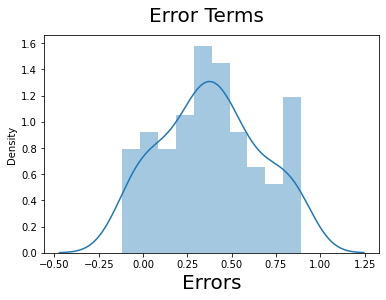

In [ ]:
fig = plt.figure()
sns.distplot((y_train_marks), bins=10)
fig.suptitle('Error Terms' ,fontsize = 20)
plt.xlabel('Errors',fontsize = 20)

In [ ]:
y_pred=lr.predict(x_test)
print(y_pred)

[[ 0.75699476]
 [ 0.34811385]
 [ 0.04223824]
 [ 0.25337179]
 [ 0.67004446]
 [-0.01227626]
 [ 0.19970464]
 [ 0.68037824]
 [ 0.68989915]
 [ 0.62833683]
 [ 0.71391826]
 [ 0.692499  ]
 [ 0.42888701]
 [ 0.38614411]
 [-0.13526301]
 [ 0.81429702]
 [ 0.34645364]
 [ 0.30419001]
 [-0.11454541]
 [ 0.03278627]
 [ 0.01433492]
 [ 0.26401248]
 [ 0.69387564]
 [ 0.08164515]
 [-0.07414549]]


In [ ]:
lr.predict([[3,4.508]])

array([[3.33487243]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9336512863546094

Text(0.5, 1.0, 'Actual vs predicted')

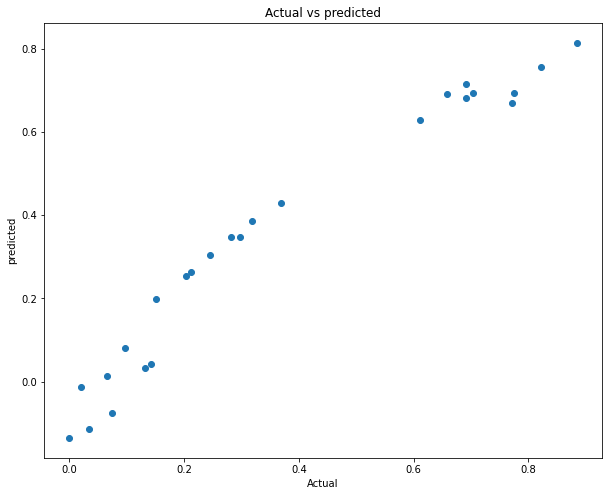

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

**Evaluation of the model using Statistic**s

In [ ]:
print(Lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     578.9
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           4.26e-45
Time:                        14:59:46   Log-Likelihood:                 94.056
No. Observations:                  75   AIC:                            -182.1
Df Residuals:                      72   BIC:                            -175.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1581      0.018     -8.

**conclusion**

The R2 value and Adjusted R2 value is 0.941 and 0.940

p < 0.05 for all coefficients which indicates that the predictions are statistically correct.

In [ ]:
!jupyter nbconvert --to html /content/Student_Marks_DataSet_649303.ipynb

[NbConvertApp] WARNING | pattern '/content/Student_Marks_DataSet_649303.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ